## DataFrame

A **dataframe** in Pandas is a collection of Series object, that is, it is effectively a spreadsheet.

Let's create a dataframe with the population and area values for different US states, i.e. it will have three columns: "name", "pop", and "area".

First, let's import the pandas and numpy modules.

In [2]:
import pandas as pd
import numpy as np

A dataframe can be created from Python lists, each containing data for one column. The lists are put into a dictionary, where keys are the names of future columns and values are the column dictionaries. The overall dictionary is the passed to the constructor method of `DataFrame`.

In [3]:
name = ["California", "Texas", "NewYork", "Florida", "Illinois"]
population  = [38332521, 26448193, 19651127, 19552860, 12882135]
area = [423967, 695662, 141297, 170312, 149995]

df = pd.DataFrame({'name': name, 'pop': population, 'area': area})

Let's print the DataFrame object. It looks exactly like a spreadsheet.

In [4]:
df

,name,pop,area
0,California,38332521,423967
1,Texas,26448193,695662
2,NewYork,19651127,141297
3,Florida,19552860,170312
4,Illinois,12882135,149995


The dataframe, just like a Series, has an index (the left-most column). Since we did not supply any particular values as the index, a range of integers was used as the index for the dataframe.

However, it is convenient to access rows by the name of the state. To be able to do that, we must set the "name" column to be the index of the dataframe, using the `set_index` method of the dataframe. We supply two arguments to the method: the name of the column to be used as the index, and an instruction to change the dataframe **in-place**, that is, the original dataframe will be altered, rather than returning a new dataframe.

In [4]:
df.set_index("name", inplace=True)

In [5]:
df


,pop,area
name,,
California,38332521,423967
Texas,26448193,695662
NewYork,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Now it has two columns instead of three, and the names used as the index.

Another way to create a dataframe is to supply dictionaries with identical sets of keys, each dictionary representing a column. The keys will then be used as the index:

In [6]:
population  = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}

area = {'California': 423967,
                   'Texas': 695662,
                   'New York': 141297,
                   'Florida': 170312,
                   'Illinois': 149995}

df = pd.DataFrame({'pop': population, 'area': area})

In [7]:
df

,pop,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


We can separately access the column names:

In [8]:
df.columns

Index(['pop', 'area'], dtype='object')

And the index:

In [9]:
df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

And the values (these are a multi-dimensional NumPy array):

In [10]:
df.values

array([[38332521,   423967],
       [26448193,   695662],
       [19651127,   141297],
       [19552860,   170312],
       [12882135,   149995]], dtype=int64)

We can also access the basic statistics on each column of the dataframe by calling its `describe` method:

In [11]:
df.describe()

,pop,area
count,5.000000e+00,5.000000
mean,2.337337e+07,316246.600000
std,9.640386e+06,242437.411951
min,1.288214e+07,141297.000000
25%,1.955286e+07,149995.000000
50%,1.965113e+07,170312.000000
75%,2.644819e+07,423967.000000
max,3.833252e+07,695662.000000


We can also access the information about the data types in each column and the index, as well as find out how much memory the dataframe occupies, using the `info` method:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, California to Illinois
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pop     5 non-null      int64
 1   area    5 non-null      int64
dtypes: int64(2)
memory usage: 120.0+ bytes


We can also look up the shape of the dataframe, that is, the number of rows and columns it has:

In [13]:
df.shape

(5, 2)

The `shape` attribute of `df` is a tuple where the first element is the number of rows and the second is the number of columns.

## Plotting a dataframe with matplotlib

The matplotlib package is a Python library for building plots, and comes as part of Anaconda. Pandas has a convenient integration with matplotlib - one can use a lot of matplotlib functionalities by calling methods on Pandas objects. For example, we can plot the data contained in a dataframe by simply calling its `plot` method:

<AxesSubplot:title={'center':'Area and population'}>

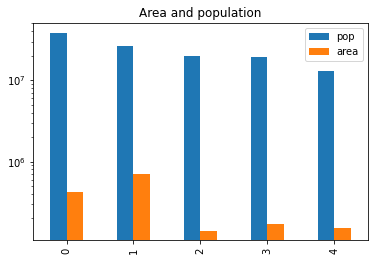

In [6]:
df.plot(kind="bar", title="Area and population", logy=True)

In the plot, each pair of bars corresponds to the index label (here, names of states), the bar of a particular colour corresponds to a column (here, the "pop" and "area" columns), and the height of the bars are the cell values for the corresponding index and column.

Notice that we passed three arguments to the `plot` method:

* **kind**, which is the type of the plot; here we used a bar plot;
* **title**
* **logy**, which is set to `True` to indicate we want to scale the y values logarithmically.

We could use many other possible arguments of the `plot` method to configure the plot in many other ways. For example:

array([<AxesSubplot:title={'center':'pop'}>,
       <AxesSubplot:title={'center':'area'}>], dtype=object)

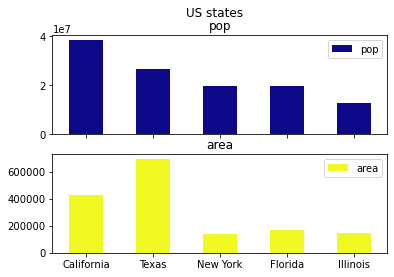

In [15]:
df.plot(kind="bar", title="US states", subplots=True, colormap="plasma", rot=0)

Here we used the **subplots** argument to indicate we want each column to be shown in a separate subplot; **colormap** to indicate a particular colour palette to use, and **rot** to indicate that the x-label labels should not be rotated.

The detailed list of the arguments that the `plot` method of `DataFrame` can take can be found in the [online documentation](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html) for Pandas.

## Data selection

From a DataFrame object, we can access a particular column, as an attribute of the object:

In [16]:
df.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Or using square brackets:

In [17]:
df['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Similarly, we can access a specific cell:

In [18]:
df.area.Texas

695662

In [19]:
df['area']['Texas']

695662

To select a range of rows and/or columns, one can use the `iloc` and `loc` attributes.

`iloc` accesses rows and columns by the integer index:

In [20]:
# select the first 3 rows, the 2 first columns
df.iloc[:3, :2]

,pop,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


`loc` accesses rows and columns by the string index:

In [21]:
df.loc[:'Illinois', :'pop']

,pop
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


As with NumPy arrays, we can access the whole row or the whole column, using the semi-column (`:`) on its own:

In [22]:
# all columns for the "Illinois" row
df.loc['Illinois', :]

pop     12882135
area      149995
Name: Illinois, dtype: int64

In [23]:
# all rows for the population column
df.loc[:, 'pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

## Adding new columns

One can perform some calculations on existing columns to create a new column with the result of the calculations. For example, suppose we wanted to create a column for the density of the population in each state. The density is the population divided by the area:

In [24]:
# the mathematical operations work exactly the same as with NumPy arrays, i.e. element-wise
df['density'] = df['pop']/df['area']
df

,pop,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


The dataframe now contains a column called "density".

Or, we can create a new column by assigning a list (or a Series) of values to a new column name. The length of the list should be the same as the number of rows in the dataframe.

In [25]:
df['region'] = ["West", "South-East", "Mid-West", "East", "South"]

In [26]:
df

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,38.018740,South-East
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Illinois,12882135,149995,85.883763,South


## Adding new rows

Let's append a new row for Ohio. We can use the `loc` method of the dataframe:

In [27]:
df.loc['Ohio'] = [11689442, 116096, 100.687, "Mid-West"]

In [28]:
df

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,38.018740,South-East
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Illinois,12882135,149995,85.883763,South
Ohio,11689442,116096,100.687000,Mid-West


## Conditional selection

We can select a subset of rows (or columns) in a dataframe, based on Boolean criteria, similarly to how this is done with a NumPy array:

In [29]:
# select states with the density value over 100
df[df.density > 100]

,pop,area,density,region
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Ohio,11689442,116096,100.687000,Mid-West


In [30]:
# select states with density less than 100 and area greater than 300,000
df[(df.density < 100) & (df.area > 300000)]

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,38.018740,South-East


## Updating a dataframe

One can update a particular cell in a dataframe by directly assigning it a new value:

In [31]:
# set the value to be None
df.loc['Texas', 'density'] = None

df

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,NaN,South-East
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Illinois,12882135,149995,85.883763,South
Ohio,11689442,116096,100.687000,Mid-West


The density value for Texas is now shown as `NaN` which is a Pandas keyword to represent a None value.

We can update multiple rows using `replace`. For example, we can change the "region" column to contain "South" instead of "South-East" throughout:

In [32]:
df["region"] = df["region"].replace("South-East", "South")

In [33]:
df

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,NaN,South
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Illinois,12882135,149995,85.883763,South
Ohio,11689442,116096,100.687000,Mid-West


We can also update entries based on a condition. Let's first create a column with a density label:

In [34]:
df['density_label'] = 'low'
df

,pop,area,density,region,density_label
California,38332521,423967,90.413926,West,low
Texas,26448193,695662,NaN,South,low
New York,19651127,141297,139.076746,Mid-West,low
Florida,19552860,170312,114.806121,East,low
Illinois,12882135,149995,85.883763,South,low
Ohio,11689442,116096,100.687000,Mid-West,low


Now, let's set the label to be high if "density" is over 100: One way is to use `loc`:

In [35]:
# the first index in loc specifies the rows to which the change applies and
# the second specifies the column:
df.loc[df["density"] > 100, "density_label"] = "high"
df

,pop,area,density,region,density_label
California,38332521,423967,90.413926,West,low
Texas,26448193,695662,NaN,South,low
New York,19651127,141297,139.076746,Mid-West,high
Florida,19552860,170312,114.806121,East,high
Illinois,12882135,149995,85.883763,South,low
Ohio,11689442,116096,100.687000,Mid-West,high


Another way is to use `apply`. Incidentally, `apply` is a very useful function which can be used to apply some operation to every row or every column in a dataframe.

The `apply` function takes a custom function as an argument, the custom function takes either a row or a column at a time and can return a modified row or column:

In [36]:
# let's re-set the density_label column to all "lows"
df['density_label'] = "low"

def func(x):
    if x['density'] > 100:
        x['density_label'] = 'high'
    return x

# the axis argument indicates if we want to process the dataframe by columns (axis=0)
# or by rows (axis=1)
df = df.apply(func, axis=1)

df

,pop,area,density,region,density_label
California,38332521,423967,90.413926,West,low
Texas,26448193,695662,NaN,South,low
New York,19651127,141297,139.076746,Mid-West,high
Florida,19552860,170312,114.806121,East,high
Illinois,12882135,149995,85.883763,South,low
Ohio,11689442,116096,100.687000,Mid-West,high


## Deleting a column

A column can be deleted using the `drop` method, supplying the name of the column and setting the `axis` argument to 1 (indicating that you want a column to be deleted):

In [37]:
df.drop('density_label', axis=1, inplace=True)

In [38]:
df

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,NaN,South
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Illinois,12882135,149995,85.883763,South
Ohio,11689442,116096,100.687000,Mid-West


## Deleting a row

A row can be deleted similarly using the `drop` method, supplying the index of the row and setting the `axis` argument to 0 (indicating that you want a row to be deleted):

In [39]:
df.drop('Ohio', axis=0, inplace=True)

In [40]:
df

,pop,area,density,region
California,38332521,423967,90.413926,West
Texas,26448193,695662,NaN,South
New York,19651127,141297,139.076746,Mid-West
Florida,19552860,170312,114.806121,East
Illinois,12882135,149995,85.883763,South


## Inspecting values in a column

As part of initial data exploration, it is often useful to check what are unique values in a categorical column, to detect mis-typed entries. This can be achieved with the `unique` method:

In [41]:
df["region"].unique()

array(['West', 'South', 'Mid-West', 'East'], dtype=object)

To find out what is the frequency of each value, one can use `value_counts`:

In [42]:
df["region"].value_counts()

South       2
West        1
Mid-West    1
East        1
Name: region, dtype: int64

To inspect the distribution of values in a numerical column, one can create a histogram, calling `hist` on the column. The method takes the argument `bins` which is the number of bins to use in the histogram:

<AxesSubplot:>

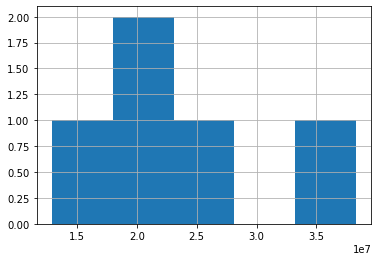

In [43]:
df['pop'].hist(bins=5)